## Taller 2: Analisis Exploratorio BD Pruebas SABER TYT

### Estudiantes:
- JAIME HUMBERTO ARISMENDI MUNOZ
- BEYCKER ALEXIS AGREDO MOSQUERA
- NICOLAS OROZCO ECHEVERRI

### Contexto del Ejercicio:
Usted trabaja en el departamento de estadísticas e información institucional de la Institución Educando Líderes, la cual ofrece programas de nivel técnico profesional y tecnológico. Se le ha encomendado la misión de analizar los resultados de la Prueba Saber TyT (es la prueba homóloga al Saber Pro, pero aplicada en técnico y tecnológico). Para ello, se le entrega una base de datos que proviene del Icfes (la del periodo 2016)

Su misión entonces es entregar un informe sobre la calidad y la preparación de los datos, de tal manera que el análisis de los resultados pueda llevarse a cabo en una segunda etapa. Si existen anomalías, la idea es que a partir de dicho informe, se construya un derecho de petición al Icfes para informar sobre las anomalías y solicitar información que permita dar solución a los problemas.

Variables a tener en cuenta:
| **Variables**    |
|:------------:|
| Edad  | 
| Género|
| Étnia | 
| Discapacidad| 
| Índice Socioeconómico| 
| Nacionalidad| 
| Puntajes | 

#### Recomendaciones del ejercicio:
Tenga en cuenta las siguientes recomendaciones:

1. En la columna "ESTU_ESTADO" se especifica si el resultado está listo para ser publicado ("PUBLICAR") o si el resultado está en revisión ("VALIDEZ OFICINA JURÍDICA"). Solo interesa trabajar con los que están listos para publicarse.

2. Para este estudio, solo interesan los estudiantes de nacionalidad colombiana.

3. Los niveles de inglés, según el Icfes, son A1-, A1, A2, B1 y B2, en dicho orden (de izquierda a derecha aumenta el nivel de desempeño).

#### **Preguntas**: 
1. Analizar el caso y revisar el diccionario de variables. El entregable aquí es que en sus palabras expresen cuál es el objetivo del proyecto de analítica.

2. Cargar la base de datos correctamente (revisar tildes, caracteres especiales y espacios en blanco deben quedar con NA).

3. Realizar las modificaciones a la base de datos que se requieran.

4. Revisar la columna **fecha de nacimiento** (¿qué encontró?). **Calcular la edad** al momento de tomar la prueba (09 de octubre de 2016).

5. Revisar la variable **nivel de inglés** (¿qué encontró?). Además, según el Ministerio de Educación Nacional, una institución de educación superior tiene la meta de llevar a sus estudiantes a nivel B1 o B2. Se necesita entonces una **nueva columna** que identifique si el estudiante cumplió o no esta condición.

6. Revisar las columnas sobre **étnia** (¿qué encontró?)

7. Revisar las columnas sobre **discapacidad** (¿qué encontró?)

8. Revisar las columnas de **puntajes**, solo los puntajes (¿qué encontró?)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick  
import seaborn as sns 

In [85]:
data = pd.read_csv("SABERTYT20162.csv", encoding='latin-1',sep=';')
data.shape

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17428\2435392839.py:1: DtypeWarning: Columns (11,12,14,61) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("SABERTYT20162.csv", encoding='latin-1',sep=';')


(53040, 104)

#### Recomendación 1 y 2:
En la columna "ESTU_ESTADO" se especifica si el resultado está listo para ser publicado ("PUBLICAR") o si el resultado está en revisión ("VALIDEZ OFICINA JURÍDICA"). Solo interesa trabajar con los que están listos para publicarse.

Para este estudio, solo interesan los estudiantes de nacionalidad colombiana.:

*Desarrollo:*

In [86]:
## Generación de una clase para filtrar la base de datos según las especificaciones:
class FiltrarBD_Saber:
    @staticmethod
    def Publicar(data):
        return data[data["ESTU_ESTADO"] == 'PUBLICAR']
    
    @staticmethod
    def Nacionalidad(data):
        return data[data["ESTU_NACIONALIDAD"] == '1 COLOMBIA']

In [87]:
def Clean_Missing(col):
    data_final[col] = data_final[col].fillna("NO")
    data_final[col] = data_final[col].replace("x","SI")
    return data_final[col]
    
def Table_desc(data, columna):
    tabla_abs = pd.crosstab(data[columna], columns="Freq. Abs").reset_index().sort_values(by="Freq. Abs", ascending= False)
    tabla_abs["Freq. Rel"] = tabla_abs["Freq. Abs"]/sum(tabla_abs["Freq. Abs"])*100
    return tabla_abs

In [88]:
## Selección de las columnas de interés para el ejercicio:
data_final = data[["ESTU_GENERO","ESTU_NACIONALIDAD","ESTU_ESTADO",                   
                           "ESTU_FECHANACIMIENTO",
                           "ESTU_TIENE_ETNIA",
                           "ESTU_ETNIA",
                           "ESTU_LIMITA_MOTRIZ",
                           "ESTU_LIMITA_INVIDENTE",
                           "ESTU_LIMITA_CONDICIONESPECIAL",
                           "ESTU_LIMITA_SORDO",
                           "ESTU_LIMITA_AUTISMO",
                           "NSE",
                           "MOD_RAZONA_CUANTITAT_PUNT",
                           "MOD_LECTURA_CRITICA_PUNT",
                           "MOD_COMPETEN_CIUDADA_PUNT",
                           "MOD_INGLES_PUNT",
                           "MOD_INGLES_DESEM",
                           "MOD_COMUNI_ESCRITA_PUNT"]]
data_final.shape

(53040, 18)

In [89]:
## Aplicación de las funciones de la clase 'FiltrarBD_Saber', esto a través de .pipe
data_final = data_final.pipe(FiltrarBD_Saber.Publicar).pipe(FiltrarBD_Saber.Nacionalidad)
data_final["ESTU_NACIONALIDAD"].value_counts()

ESTU_NACIONALIDAD
1 COLOMBIA    52665
Name: count, dtype: int64

#### Recomendación 3
Los niveles de inglés, según el Icfes, son A1-, A1, A2, B1 y B2, en dicho orden (de izquierda a derecha aumenta el nivel de desempeño).

In [90]:
data_final["MOD_INGLES_DESEM"].unique()

array(['A2', 'B1', 'A1', 'A1-', 'B2'], dtype=object)

### Base de datos final:

En este momento obtuvimos la base de datos filtrada por las recomendaciones de los puntos 1 y 2; adicionalmente seleccionamos únicamente las columnas de interes para nuestro analisis, por lo cual reducimos la dimensión de la base de datos de tener 104 columnas a aproximadamente 18. Las cuales son las siguientes:

```
       ['ESTU_GENERO', 'ESTU_NACIONALIDAD', 'ESTU_ESTADO','ESTU_FECHANACIMIENTO', 'ESTU_TIENE_ETNIA', 'ESTU_ETNIA',
       'ESTU_LIMITA_MOTRIZ', 'ESTU_LIMITA_INVIDENTE','ESTU_LIMITA_CONDICIONESPECIAL', 'ESTU_LIMITA_SORDO',
       'ESTU_LIMITA_AUTISMO', 'NSE', 'MOD_RAZONA_CUANTITAT_PUNT','MOD_LECTURA_CRITICA_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT',
       'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT']
```

In [91]:
data_final.columns

Index(['ESTU_GENERO', 'ESTU_NACIONALIDAD', 'ESTU_ESTADO',
       'ESTU_FECHANACIMIENTO', 'ESTU_TIENE_ETNIA', 'ESTU_ETNIA',
       'ESTU_LIMITA_MOTRIZ', 'ESTU_LIMITA_INVIDENTE',
       'ESTU_LIMITA_CONDICIONESPECIAL', 'ESTU_LIMITA_SORDO',
       'ESTU_LIMITA_AUTISMO', 'NSE', 'MOD_RAZONA_CUANTITAT_PUNT',
       'MOD_LECTURA_CRITICA_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT',
       'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_COMUNI_ESCRITA_PUNT'],
      dtype='object')

In [92]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52665 entries, 0 to 53039
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_GENERO                    52663 non-null  object 
 1   ESTU_NACIONALIDAD              52665 non-null  object 
 2   ESTU_ESTADO                    52665 non-null  object 
 3   ESTU_FECHANACIMIENTO           52664 non-null  object 
 4   ESTU_TIENE_ETNIA               48374 non-null  object 
 5   ESTU_ETNIA                     3086 non-null   object 
 6   ESTU_LIMITA_MOTRIZ             46 non-null     object 
 7   ESTU_LIMITA_INVIDENTE          4 non-null      object 
 8   ESTU_LIMITA_CONDICIONESPECIAL  7 non-null      object 
 9   ESTU_LIMITA_SORDO              29 non-null     object 
 10  ESTU_LIMITA_AUTISMO            3 non-null      object 
 11  NSE                            51912 non-null  object 
 12  MOD_RAZONA_CUANTITAT_PUNT      52665 non-null  int6

#### Variables con Missing Data:

Podemos observar que la mayor cantidad de variables con **datos faltantes** son aquellas relacionadas con las limitaciones físicas de los estudiantes y la etnia, lo que probablemente se relaciona con la **AUSENCIA** de dicha característica, por lo cual para omitir dicho missing, se llenaran dichos valores con un valor de **"NO"** para especificar la negatividad a dicho valor.

In [93]:
missing = data_final.isna().sum() /len(data_final)*100
missing = pd.DataFrame(missing).reset_index()
missing.columns = ["Variable", "Missing"]
missing = missing.sort_values(by="Missing", ascending=False).reset_index()
missing.drop(columns="index", inplace=True)
missing

,Variable,Missing
0,ESTU_LIMITA_AUTISMO,99.994304
1,ESTU_LIMITA_INVIDENTE,99.992405
2,ESTU_LIMITA_CONDICIONESPECIAL,99.986708
3,ESTU_LIMITA_SORDO,99.944935
4,ESTU_LIMITA_MOTRIZ,99.912655
5,ESTU_ETNIA,94.140321
6,ESTU_TIENE_ETNIA,8.147726
7,MOD_COMUNI_ESCRITA_PUNT,1.462072
8,NSE,1.429792
9,ESTU_GENERO,0.003798


In [94]:
Variables_categorias = ["ESTU_GENERO",
                        "ESTU_NACIONALIDAD",     
                        "ESTU_TIENE_ETNIA",
                        "ESTU_ETNIA",
                        "ESTU_LIMITA_MOTRIZ",
                        "ESTU_LIMITA_INVIDENTE",
                        "ESTU_LIMITA_CONDICIONESPECIAL",
                        "ESTU_LIMITA_SORDO",
                        "ESTU_LIMITA_AUTISMO",]

#### Base de datos limpia sin NA

In [95]:
for var in Variables_categorias:
    Clean_Missing(var)


missing = data_final.isna().sum() /len(data_final)*100
missing = pd.DataFrame(missing).reset_index()
missing.columns = ["Variable", "Missing"]
missing = missing.sort_values(by="Missing", ascending=False).reset_index()
missing.drop(columns="index", inplace=True)
missing

,Variable,Missing
0,MOD_COMUNI_ESCRITA_PUNT,1.462072
1,NSE,1.429792
2,ESTU_FECHANACIMIENTO,0.001899
3,ESTU_LIMITA_AUTISMO,0.000000
4,MOD_INGLES_DESEM,0.000000
5,MOD_INGLES_PUNT,0.000000
6,MOD_COMPETEN_CIUDADA_PUNT,0.000000
7,MOD_LECTURA_CRITICA_PUNT,0.000000
8,MOD_RAZONA_CUANTITAT_PUNT,0.000000
9,ESTU_GENERO,0.000000


### Pregunta 4: Revisión Fecha de nacimiento y calculo de Edad:

In [96]:
from datetime import datetime
data_final["ESTU_FECHANACIMIENTO"] = pd.to_datetime(data_final["ESTU_FECHANACIMIENTO"])
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52665 entries, 0 to 53039
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_GENERO                    52665 non-null  object        
 1   ESTU_NACIONALIDAD              52665 non-null  object        
 2   ESTU_ESTADO                    52665 non-null  object        
 3   ESTU_FECHANACIMIENTO           52664 non-null  datetime64[ns]
 4   ESTU_TIENE_ETNIA               52665 non-null  object        
 5   ESTU_ETNIA                     52665 non-null  object        
 6   ESTU_LIMITA_MOTRIZ             52665 non-null  object        
 7   ESTU_LIMITA_INVIDENTE          52665 non-null  object        
 8   ESTU_LIMITA_CONDICIONESPECIAL  52665 non-null  object        
 9   ESTU_LIMITA_SORDO              52665 non-null  object        
 10  ESTU_LIMITA_AUTISMO            52665 non-null  object        
 11  NSE                 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17428\1034290200.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_final["ESTU_FECHANACIMIENTO"] = pd.to_datetime(data_final["ESTU_FECHANACIMIENTO"])


In [97]:
data_final["ESTU_EDAD"] = datetime(year=2016, month= 10, day= 9) - data_final["ESTU_FECHANACIMIENTO"]
data_final["ESTU_EDAD"] = data_final["ESTU_EDAD"].dt.days / 365
data_final["ESTU_EDAD"]

0        26.169863
1        26.054795
2        21.964384
3        37.068493
4        28.279452
           ...    
53035    24.731507
53036    24.273973
53037    28.106849
53038    22.698630
53039    28.668493
Name: ESTU_EDAD, Length: 52665, dtype: float64

In [98]:
import seaborn as sns
import plotly as pt

### Analisis variables Fecha de Nacimiento y Edad:

Podemos denotar en estas variables varias inconsistencias en relación a las edades de los estudiantes que presentaron el examen, esto dado por los siguientes datos descriptivos de la variable edad:
```
count    52664.000000
mean        25.474069
std          6.965131
min         -7.273973
25%         20.580822
50%         23.189041
75%         28.482192
max         71.871233
```
- Llama la atención los valores mínimos y máximos de la variable, dado que **NINGUN** estudiante deberia tener **< 18 años** a la hora de presentar el examen, dado que es aquel que se presenta al final de los cursos de Tecnico y tecnologo. Y los valores máximos como outliers podrían ser datos verdaderos pero aquellos **> 30 años** ya empiezan a ser datos inconsistentes
- Es interesante observar como los valores concordantes se centran dentro del Q1 y el Q3, teniendo un rango de edad desde los 20 hasta los 28 años aproximadamente

In [99]:
data_final["ESTU_EDAD"].describe()

count    52664.000000
mean        25.474069
std          6.965131
min         -7.273973
25%         20.580822
50%         23.189041
75%         28.482192
max         71.871233
Name: ESTU_EDAD, dtype: float64

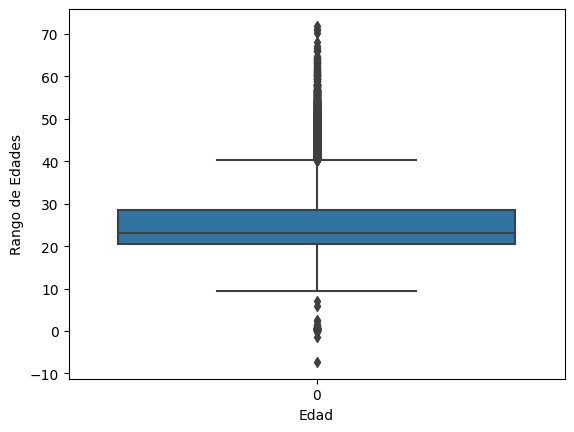

In [100]:
sns.boxplot(data_final["ESTU_EDAD"])
plt.xlabel("Edad")
plt.ylabel("Rango de Edades")
plt.show()

### Pregunta 5: Variable Inglés

Al final del analisis podemos determinar que la mayor parte de los estudiantes tienen un nivel de inglés menor a A2, considerando aproximadamente el 85% de la muestra. Lo que nos indica el Ministerio de Educación no logra cumplir la meta de que los estudiantes logren alcanzar el nivel B1 o B2, esto se observa mejor en el gráfico de pastel donde solo el 14% de los estudiantes lográn alcanzar este nivel de inglés durante sus estudios básicos y secundarios.

In [101]:
data_final["MOD_INGLES_DESEM"].unique()

array(['A2', 'B1', 'A1', 'A1-', 'B2'], dtype=object)

In [102]:
table_ingles = Table_desc(data_final, 'MOD_INGLES_DESEM')
table_ingles

col_0,MOD_INGLES_DESEM,Freq. Abs,Freq. Rel
0,A1,18799,35.695433
2,A2,13540,25.709674
1,A1-,12965,24.617868
3,B1,5995,11.383272
4,B2,1366,2.593753


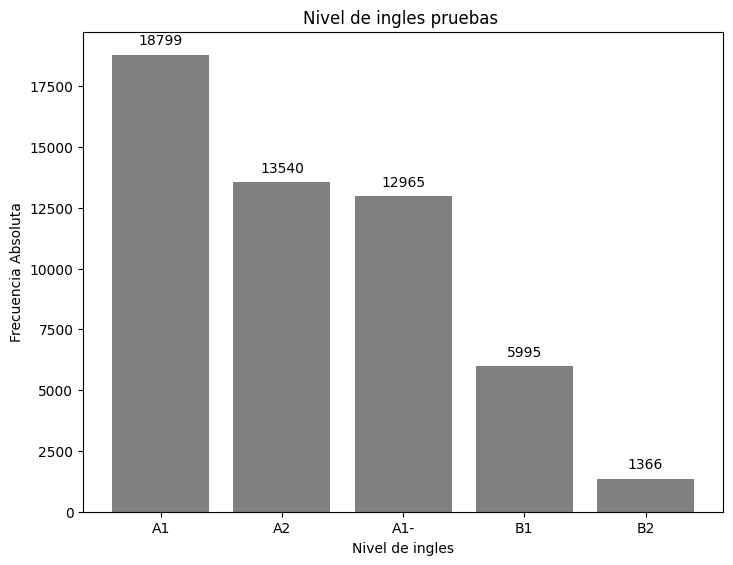

In [103]:
fig_ing = plt.figure()
ax_ing = fig_ing.add_axes([0,0,1,1])
ax_ing.bar(table_ingles["MOD_INGLES_DESEM"], table_ingles["Freq. Abs"], color = "gray")
ax_ing.bar_label(ax_ing.containers[0], label_type='edge', fmt='%.0f', padding= 5)
plt.title("Nivel de ingles pruebas ")
plt.ylabel('Frecuencia Absoluta')
plt.xlabel('Nivel de ingles')
plt.show()

In [104]:
data_final["INGLES_VALIDACION"] = data_final["MOD_INGLES_DESEM"].apply(lambda x: "SI CUMPLE" if x == 'B1' or x == 'B2' else "NO CUMPLE")

In [105]:
table_ingles_cumplir = Table_desc(data_final,'INGLES_VALIDACION')
table_ingles_cumplir

col_0,INGLES_VALIDACION,Freq. Abs,Freq. Rel
0,NO CUMPLE,45304,86.022975
1,SI CUMPLE,7361,13.977025


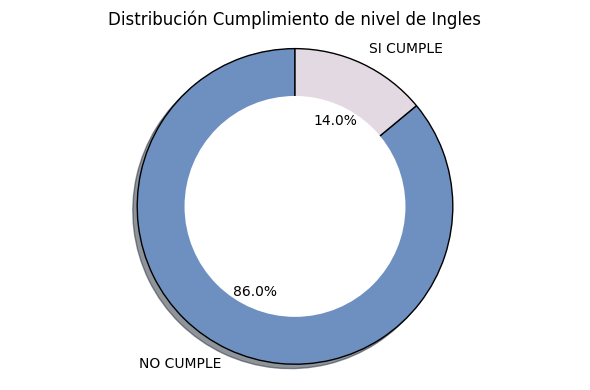

In [106]:
cmap = plt.get_cmap("twilight")
plt.figure(figsize=(6, 4))
plt.pie(table_ingles_cumplir["Freq. Rel"],labels=table_ingles_cumplir["INGLES_VALIDACION"], autopct='%1.1f%%', colors=cmap(np.linspace(0.2, 1, len(table_ingles_cumplir["Freq. Rel"]))),
        shadow=True, startangle=90, wedgeprops={'edgecolor': 'black'})
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribución Cumplimiento de nivel de Ingles")
plt.axis('equal') 
plt.tight_layout()
plt.show()

#### Pregunta 6: Etnias

In [107]:
import unidecode

def remove_accents(a):
    return unidecode.unidecode(a)

data_final['ESTU_ETNIA'] = data_final['ESTU_ETNIA'].apply(remove_accents)

In [108]:
data_final["ESTU_ETNIA"].unique()

array(['NO', '19 Otro grupo etnico minoritario',
       '1 Comunidad afrodescendiente', '100 Ninguno', '4 Paez', '9 Pasto',
       '11 Inga', '7 Pijao', '2 Raizal', '12 Tucano', '15 Palenquero',
       '8 Wayuu', '18 Zenu', '6 Embera ', '10 Cancuamo', '17 Guambiano',
       '3 Comunidad Rom (gitana)', '13 Huitoto', '16 Arhuaco'],
      dtype=object)

In [109]:
data_final["ESTU_TIENE_ETNIA"].unique()

array(['NO', 'SI'], dtype=object)

In [110]:
etnias_error = data_final[(data_final["ESTU_TIENE_ETNIA"] == 'NO') & (data_final["ESTU_ETNIA"] != 'NO')]
len(etnias_error)

76

In [111]:
etnias_error = pd.DataFrame(etnias_error["ESTU_ETNIA"].value_counts()).reset_index()
etnias_error

,ESTU_ETNIA,count
0,100 Ninguno,41
1,19 Otro grupo etnico minoritario,20
2,1 Comunidad afrodescendiente,8
3,9 Pasto,3
4,2 Raizal,2
5,18 Zenu,1
6,7 Pijao,1


#### Inconsistencias Etnias

Podemos observar que existen 76 registros con error en la variable Etnias, dado por, la condición de la variable "ESTU_TIENE_ETNIA" donde si se responde "NO" se asume que el estudiante no tiene etnia, por ende, estos 76 registros no respetan esta regla y se toman como inconsistentes.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17428\1967691546.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_et.set_xticklabels(etnias_error["ESTU_ETNIA"], rotation=90, ha="right")


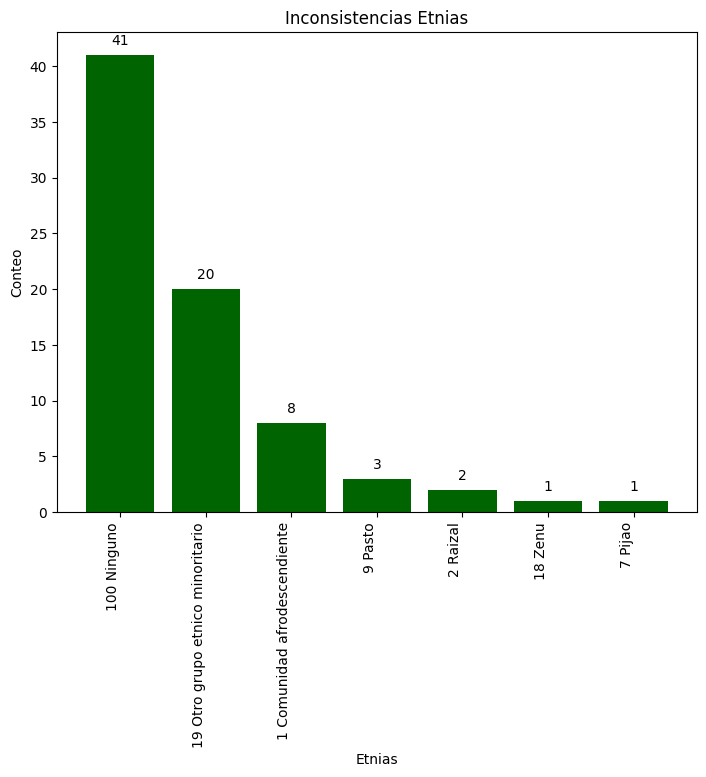

In [112]:
fig_etnias = plt.figure()
ax_et = fig_etnias.add_axes([0,0,1,1])
ax_et.bar(etnias_error["ESTU_ETNIA"], etnias_error["count"], color="darkgreen")
ax_et.bar_label(ax_et.containers[0], label_type='edge', fmt='%.0f', padding= 5)
plt.title("Inconsistencias Etnias")
plt.ylabel('Conteo')
plt.xlabel('Etnias')
ax_et.set_xticklabels(etnias_error["ESTU_ETNIA"], rotation=90, ha="right")
plt.show()

In [113]:
data_final['ESTU_ETNIA'].replace("100 Ninguno", "NO", inplace=True)

#### Variable Etnia

Evidenciamos la clara minoria de personas que pertenecen a una Etnia y que presentan este examen, al punto que, se requiere excluir aquellas personas que NO pertenecen a una para poder evidenciar mejor la frecuencia en el gráfico de barras, dado que estos son **menos del 3%** de la muestra.

Igualmente este número podría reducirse si se decidiera eliminar aquellos valores inconsistentes mencionados previamente.

In [119]:
table_etnias = Table_desc(data_final,'ESTU_ETNIA')
table_etnias

col_0,ESTU_ETNIA,Freq. Abs,Freq. Rel
17,NO,51210,97.237254
0,1 Comunidad afrodescendiente,681,1.293079
9,19 Otro grupo etnico minoritario,445,0.844963
12,4 Paez,72,0.136713
8,18 Zenu,57,0.108231
16,9 Pasto,42,0.079749
10,2 Raizal,40,0.075952
13,6 Embera,32,0.060761
14,7 Pijao,21,0.039875
15,8 Wayuu,19,0.036077


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17428\1745579383.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_et.set_xticklabels(table_etnias["ESTU_ETNIA"], rotation=90, ha="right")


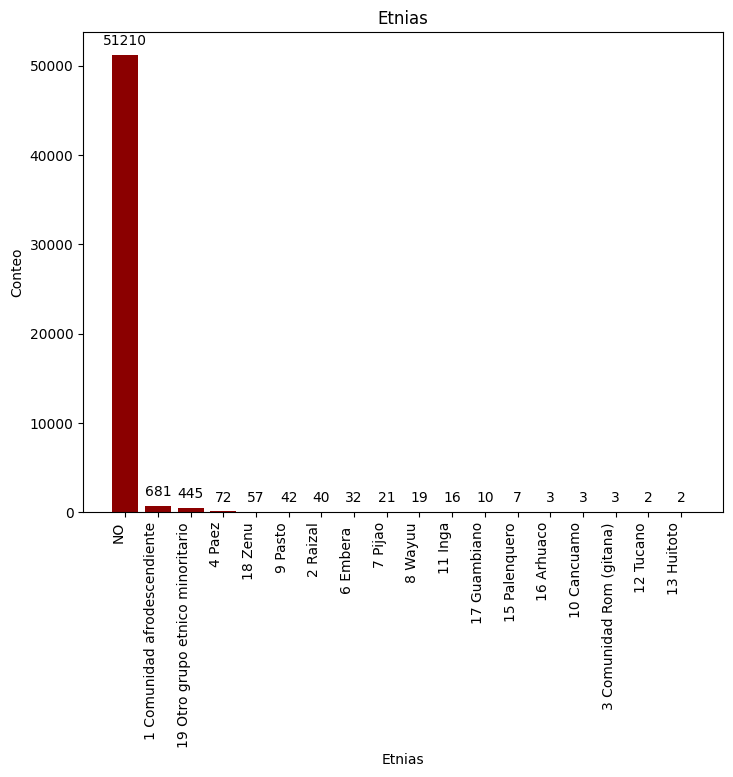

In [120]:
fig_etnias = plt.figure()
ax_et = fig_etnias.add_axes([0,0,1,1])
ax_et.bar(table_etnias["ESTU_ETNIA"],table_etnias["Freq. Abs"], color="darkred")
ax_et.bar_label(ax_et.containers[0], label_type='edge', fmt='%.0f', padding= 5)
plt.title("Etnias")
plt.ylabel('Conteo')
plt.xlabel('Etnias')
ax_et.set_xticklabels(table_etnias["ESTU_ETNIA"], rotation=90, ha="right")
plt.show()

In [114]:
table_etnias = Table_desc(data_final,'ESTU_ETNIA')
table_etnias.drop(index=17, inplace= True) ## Elimino los resultado de "NO" para dar representatividad a las Etnias
table_etnias

col_0,ESTU_ETNIA,Freq. Abs,Freq. Rel
0,1 Comunidad afrodescendiente,681,1.293079
9,19 Otro grupo etnico minoritario,445,0.844963
12,4 Paez,72,0.136713
8,18 Zenu,57,0.108231
16,9 Pasto,42,0.079749
10,2 Raizal,40,0.075952
13,6 Embera,32,0.060761
14,7 Pijao,21,0.039875
15,8 Wayuu,19,0.036077
2,11 Inga,16,0.030381


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17428\1745579383.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_et.set_xticklabels(table_etnias["ESTU_ETNIA"], rotation=90, ha="right")


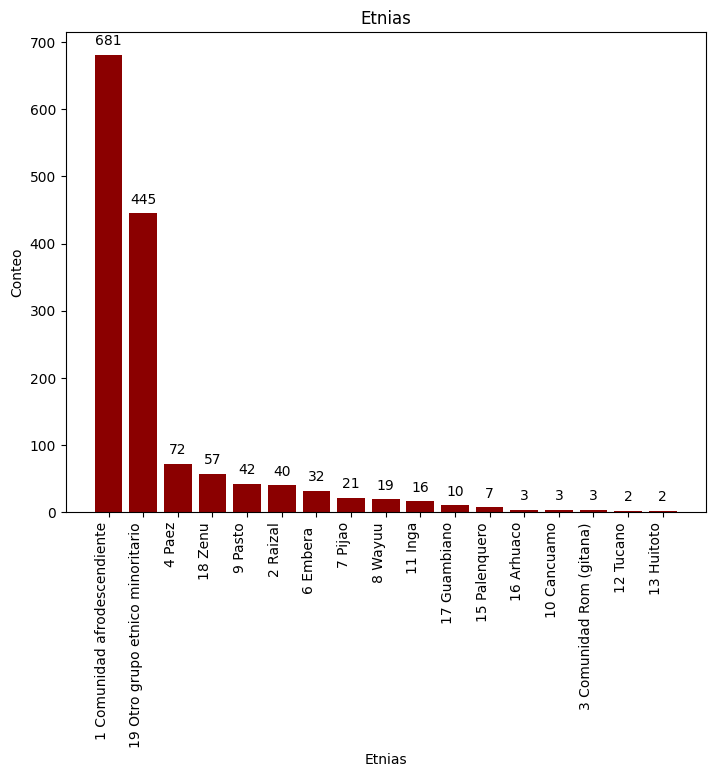

In [115]:
fig_etnias = plt.figure()
ax_et = fig_etnias.add_axes([0,0,1,1])
ax_et.bar(table_etnias["ESTU_ETNIA"],table_etnias["Freq. Abs"], color="darkred")
ax_et.bar_label(ax_et.containers[0], label_type='edge', fmt='%.0f', padding= 5)
plt.title("Etnias")
plt.ylabel('Conteo')
plt.xlabel('Etnias')
ax_et.set_xticklabels(table_etnias["ESTU_ETNIA"], rotation=90, ha="right")
plt.show()

#### Pregunta 7: Limitaciones

In [116]:
var_discapacidad = ["ESTU_LIMITA_MOTRIZ","ESTU_LIMITA_INVIDENTE","ESTU_LIMITA_CONDICIONESPECIAL","ESTU_LIMITA_SORDO","ESTU_LIMITA_AUTISMO"]

for var in var_discapacidad:
    data_final[var] = data_final[var].replace("x", 1).replace(np.nan, 0).astype(str)
data_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 52665 entries, 0 to 53039
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ESTU_GENERO                    52665 non-null  object        
 1   ESTU_NACIONALIDAD              52665 non-null  object        
 2   ESTU_ESTADO                    52665 non-null  object        
 3   ESTU_FECHANACIMIENTO           52664 non-null  datetime64[ns]
 4   ESTU_TIENE_ETNIA               52665 non-null  object        
 5   ESTU_ETNIA                     52665 non-null  object        
 6   ESTU_LIMITA_MOTRIZ             52665 non-null  object        
 7   ESTU_LIMITA_INVIDENTE          52665 non-null  object        
 8   ESTU_LIMITA_CONDICIONESPECIAL  52665 non-null  object        
 9   ESTU_LIMITA_SORDO              52665 non-null  object        
 10  ESTU_LIMITA_AUTISMO            52665 non-null  object        
 11  NSE                 

In [117]:
data_final["ESTU_LIMITA_CONDICIONESPECIAL"].value_counts()

ESTU_LIMITA_CONDICIONESPECIAL
NO    52658
SI        7
Name: count, dtype: int64

#### Variable Limitaciones

Como podemos evidenciar en el gráfico de barras, esta población igualmente representa una minoria comparandola con el general de la población que presentan este examen estatal. Siendo estos incluso menos del 2% del general de la muestra.

In [123]:
limitaciones = ("MOTRIZ", "INVIDENTE", "CONDICIONESPECIAL", "SORDO", "AUTISMO")
limitacion_categorizadas = {
    'LIMITACIÓN': limitaciones,
    'SI (Fecuencia Relativa %)': ((data_final["ESTU_LIMITA_MOTRIZ"] == "SI").sum(),
           (data_final["ESTU_LIMITA_INVIDENTE"] == "SI").sum(),
          (data_final["ESTU_LIMITA_CONDICIONESPECIAL"] == "SI").sum(),
          (data_final["ESTU_LIMITA_SORDO"] == "SI").sum(),
          (data_final["ESTU_LIMITA_AUTISMO"] == "SI").sum()),
    'NO (Fecuencia Relativa %)': ((data_final["ESTU_LIMITA_MOTRIZ"] == "NO").sum(),
          (data_final["ESTU_LIMITA_INVIDENTE"] == "NO").sum(),
          (data_final["ESTU_LIMITA_CONDICIONESPECIAL"] == "NO").sum(),
          (data_final["ESTU_LIMITA_SORDO"] == "NO").sum(),
          (data_final["ESTU_LIMITA_AUTISMO"] == "NO").sum())
}
limitacion_categorizadas = pd.DataFrame(limitacion_categorizadas)

limitacion_categorizadas["SI (Fecuencia Relativa %)"] = limitacion_categorizadas["SI (Fecuencia Relativa %)"].apply(lambda x: round((x/len(data_final))*100,2))
limitacion_categorizadas["NO (Fecuencia Relativa %)"] = limitacion_categorizadas["NO (Fecuencia Relativa %)"].apply(lambda x: round((x/len(data_final))*100,2))

limitacion_categorizadas

,LIMITACIÓN,SI (Fecuencia Relativa %),NO (Fecuencia Relativa %)
0,MOTRIZ,0.09,99.91
1,INVIDENTE,0.01,99.99
2,CONDICIONESPECIAL,0.01,99.99
3,SORDO,0.06,99.94
4,AUTISMO,0.01,99.99


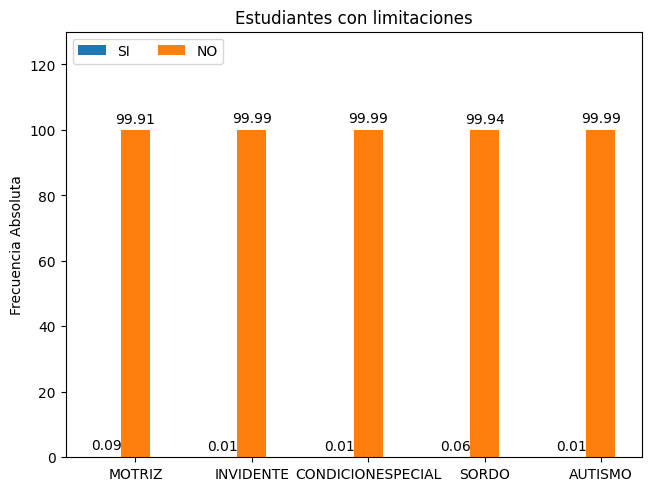

In [124]:
limitaciones = ("MOTRIZ", "INVIDENTE", "CONDICIONESPECIAL", "SORDO", "AUTISMO")



si_no = {
    'SI': tuple(list(limitacion_categorizadas["SI (Fecuencia Relativa %)"])),
    'NO': tuple(list(limitacion_categorizadas["NO (Fecuencia Relativa %)"]))
}

x = np.arange(len(limitaciones)) 
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in si_no.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Frecuencia Absoluta')
ax.set_title('Estudiantes con limitaciones')
ax.set_xticks(x + width, limitaciones)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 130)

plt.show()

#### Pregunta 8: Puntajes:

In [140]:
from scipy.stats import skew, kurtosis
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [127]:
#Analisis de los puntajes
df_puntajes = data_final[["MOD_RAZONA_CUANTITAT_PUNT", "MOD_LECTURA_CRITICA_PUNT", "MOD_COMPETEN_CIUDADA_PUNT", "MOD_INGLES_PUNT","MOD_COMUNI_ESCRITA_PUNT"]]
df_puntajes

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
0,80,114,100,115,121.0
1,122,112,100,112,123.0
2,115,117,123,144,99.0
3,82,101,85,88,75.0
4,95,106,84,79,86.0
...,...,...,...,...,...
53035,69,54,54,91,104.0
53036,58,41,65,97,75.0
53037,106,101,102,88,60.0
53038,113,110,92,99,122.0


In [141]:
fun_tabla_descriptivas(df_puntajes)

,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT
count,52665.000000,52665.000000,52665.000000,52665.000000,51895.000000
mean,96.479863,95.800019,97.988759,100.026545,100.039349
std,21.757795,22.678697,22.223269,21.410427,20.085850
min,0.000000,0.000000,0.000000,0.000000,49.000000
25%,81.000000,81.000000,82.000000,85.000000,85.000000
50%,96.000000,97.000000,99.000000,98.000000,102.000000
75%,111.000000,112.000000,114.000000,112.000000,115.000000
max,200.000000,200.000000,200.000000,200.000000,200.000000
coef. variation,0.225516,0.236730,0.226794,0.214047,0.200779
skew,0.106675,-0.122348,-0.097387,0.296807,NaN


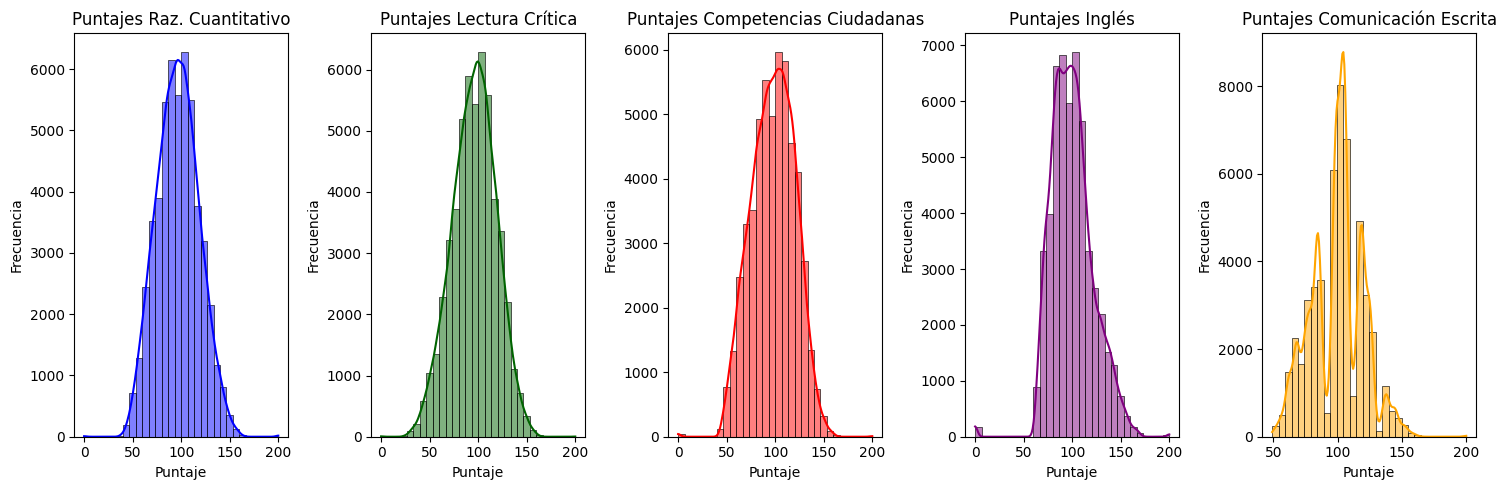

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# Crear histograma para data1
sns.histplot(df_puntajes["MOD_RAZONA_CUANTITAT_PUNT"], kde=True,bins=30, alpha=0.5, color='blue', ax= axes[0])
axes[0].set_xlabel('Puntaje')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Puntajes Raz. Cuantitativo')
#axes[0].legend()

# Crear histograma para data2
sns.histplot(df_puntajes["MOD_LECTURA_CRITICA_PUNT"], kde=True,bins=30, alpha=0.5, color='darkgreen', ax=axes[1])
axes[1].set_xlabel('Puntaje')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Puntajes Lectura Crítica')
#axes[1].legend()

# Crear histograma para data3

sns.histplot(df_puntajes["MOD_COMPETEN_CIUDADA_PUNT"], kde=True,bins=30, alpha=0.5, color='red', ax=axes[2])
axes[2].set_xlabel('Puntaje')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('Puntajes Competencias Ciudadanas')
#axes[2].legend()

# Crear histograma para data4

sns.histplot(df_puntajes["MOD_INGLES_PUNT"], kde=True,bins=30, alpha=0.5, color='purple', ax=axes[3])
axes[3].set_xlabel('Puntaje')
axes[3].set_ylabel('Frecuencia')
axes[3].set_title('Puntajes Inglés')
#axes[3].legend()

# Crear histograma para data5

sns.histplot(df_puntajes["MOD_COMUNI_ESCRITA_PUNT"], kde=True,bins=30, alpha=0.5, color='orange', ax=axes[4])
axes[4].set_xlabel('Puntaje')
axes[4].set_ylabel('Frecuencia')
axes[4].set_title('Puntajes Comunicación Escrita')
#axes[4].legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [144]:
data_final["MOD_COMUNI_ESCRITA_PUNT"].isna().sum()

770



#### Puntajes

Es interesante ver que los histogramas en general aparentan una distribución normal en todos los puntajes, ubicandose la mayor parte de los estudiantes entre 50-150 puntos, siendo un puntaje promedio regular para la muestra en general, dado que el puntaje máximo es 200. 

Es llamativo el comportamiento de los puntajes para **"Comunicación Escrita"** siendo el modulo donde peor desempeño tienen los estudiantes colombianos, lo cual podría estar relacionado con el nivel de educación ofertada por las instituciones donde dichos estudiantes cumplieron sus tecnicos y tecnologos.

1. **PUNTAJE RAZONAMIENTO CUANTITATIVO**
La distribución del PUNTAJE RAZONAMIENTO CUANTITATIVO se caracteriza por una tendencia central en torno a una media de 96.47 y una mediana de 96.0, lo cual sugiere que la mayoría de los valores se agrupan alrededor de este valor. La kurtosis calculada tiene un valor de -0.20 revela un acercamiento a la distribución normal pero con colas más pesadas que la distribución normal. El Skew calculado da un valor de 0.10, lo que indica que la distribución tiene un leve sesgo positivo hacia la derecha y un coeficiente de variación de 22.5%, lo que indica que los valores en general son muy homogeneos.
2. **PUNTAJE LECTURA CRÍTICA**
La distribución del PUNTAJE LECTURA CRÍTICA se caracteriza por una tendencia central en torno a una media de 95.8 y una mediana de 97, lo cual sugiere que la mayoría de los valores se agrupan alrededor de este valor. La kurtosis calculada tiene un valor de -0.19 revela un acercamiento a la distribución normal pero con colas más pesadas que la distribución normal. El Skew calculado da un valor de -0.12, lo que indica que la distribución tiene un leve sesgo negativo hacia la izquierda y un coeficiente de variación de 23.6%, lo que indica homogeneidad de los valores
3. **PUNTAJE COMPETENCIAS CIUDADANAS**
La distribución del PUNTAJE COMPETENCIAS CIUDADANAS se caracteriza por una tendencia central en torno a una media de 97.98 y una mediana de 99.0, lo cual sugiere que la mayoría de los valores se agrupan alrededor de este valor. La kurtosis calculada tiene un valor de -0.31 revela un acercamiento a la distribución normal pero con colas más pesadas que la distribución normal. El Skew calculado da un valor de -0.09, lo que indica que la distribución no tiene un sesgo significativo y un coeficiente de variación de 22.6%, lo que indica que los valores en general son muy homogeneos.
4. **PUNTAJE INGLES**
La distribución del PUNTAJE INGLES se caracteriza por una tendencia central en torno a una media de 100 y una mediana de 98.0, lo cual sugiere que la mayoría de los valores se agrupan alrededor de este valor. La kurtosis calculada tiene un valor de 1.36 revela una distribución leptocurtica con colas menos pesadas que la distribución normal. El Skew calculado da un valor de 0.29, lo que indica que la distribución tiene un sesgo positivo hacia la derecha y un coeficiente de variación de 21%.
4. **PUNTAJE COMUNICACION ESCRITA**
La distribución del PUNTAJE INGLES se caracteriza por una tendencia central en torno a una media de 100 y una mediana de 102.0, lo cual sugiere que la mayoría de los valores se agrupan alrededor de este valor. Esta variable contiene 770 valores faltantes por lo cual los datos calculados de Skew y Kurtosis no se pueden calcular.
